# RNA-seq gene expression data for cancer classification
---
Data retrieved from https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
rna_exp = pd.read_csv('data.csv', index_col=[0])

In [ ]:
labels = pd.read_csv('labels.csv', index_col=[0])

## Exploring data

In [ ]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


In [ ]:
rna_exp.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
rna_merged = pd.concat([rna_exp, labels], axis=1)

In [ ]:
rna_merged.shape

(801, 20532)

In [ ]:
exp = rna_merged.set_index('Class').sort_index()

In [ ]:
exp.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.0,3.801873,5.025591,6.404150,9.564754,0.0,9.997688,1.025241,0.0,0.0,...,5.919628,8.507347,9.849333,8.184360,9.796564,11.607552,10.456272,9.949412,5.980037,0.000000
BRCA,0.0,3.277330,2.629846,6.000487,9.627027,0.0,8.375748,1.029559,0.0,0.0,...,6.152192,9.015499,10.244994,5.172335,9.788066,11.582057,11.098776,9.909158,5.494595,0.000000
BRCA,0.0,1.149975,0.462576,5.861427,10.092440,0.0,5.445833,1.045932,0.0,0.0,...,6.494526,9.549727,10.037602,6.636375,9.459339,10.109922,10.442394,9.574616,3.541862,0.000000
BRCA,0.0,4.538159,3.955722,6.259862,9.103243,0.0,6.918327,1.162726,0.0,0.0,...,7.102994,9.813018,10.629311,7.128757,10.409104,11.195225,11.169593,10.513451,6.729131,0.270828
BRCA,0.0,2.599770,2.562792,7.365491,10.462155,0.0,7.922370,0.000000,0.0,0.0,...,5.036873,8.267555,9.630254,5.531385,9.241642,11.459872,10.045882,9.091528,9.356654,0.000000


In [ ]:
exp.shape

(801, 20531)

In [ ]:
#sns.heatmap(exp)

In [ ]:
#sns.clustermap(exp)

In [ ]:
exp.index.value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [ ]:
exp.isnull().values.any()
exp.dropna(axis=0, inplace=True)

## Unsupervised Learning
---
### 1. Visualization and dimensionality reduction

#### 1.1 PCA
Principal component analysis

In [ ]:
features = list(exp.columns.values)
len(features)
#x = exp.loc[:,features].values

20531

In [ ]:
x = rna_exp[features].reset_index(drop=True)
y = labels

In [ ]:
x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
y = y.reset_index(drop=True)
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


Rescale dataframe

In [ ]:
x_std_scale = StandardScaler().fit_transform(x)

In [ ]:
x_std_scale

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
n_classes = len(y.groupby('Class'))
n_classes

5

In [ ]:
x.dropna(axis=0, inplace=True)

In [ ]:
x.shape

(801, 20531)

In [ ]:
y.dropna(axis=0, inplace=True)

In [ ]:
y.shape

(801, 1)

In [ ]:
pca = PCA(n_components=2)
principal_component = pca.fit_transform(x)

In [ ]:
principal_df = pd.DataFrame(data=principal_component, columns=['Principal Component 1', 'Principal Component 2'])

In [ ]:
principal_df.head()

,Principal Component 1,Principal Component 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940


In [ ]:
concat_df = pd.concat([principal_df, y['Class']], axis=1)

In [ ]:
concat_df.head()

concat_df.shape

(801, 3)

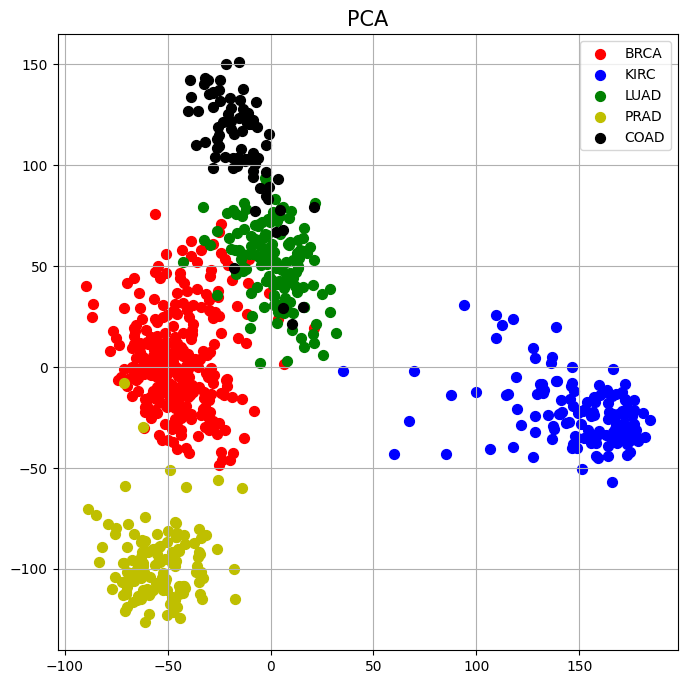

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('PCA', fontsize=15)
labels_list = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list, colors):
    indices = concat_df['Class'] == lab
    ax.scatter(concat_df.loc[indices, 'Principal Component 1'],
              concat_df.loc[indices, 'Principal Component 2'],
              c = color,
              s = 50)
    ax.legend(labels_list)
    ax.grid()



#### 1.2 t-SNE
t-distributed Stochastic Neighbor Embedding

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_rnaexp = tsne.fit_transform(x)

In [ ]:
tsne_rnaexp.shape

(801, 2)

In [ ]:
tsne_df = pd.DataFrame(data=tsne_rnaexp, columns=['tsne 1', 'tsne 2'])

In [ ]:
tsne_df

,tsne 1,tsne 2
0,-0.071367,-39.328201
1,12.881719,18.755415
2,-6.402750,-35.346748
3,-5.598386,-35.113819
4,-17.778538,0.074788
...,...,...
796,-18.244080,-2.696990
797,14.306295,28.139284
798,-6.774517,38.990593
799,-1.204997,-36.302849


In [ ]:
tsne_concat_df = pd.concat([tsne_df, y['Class']], axis=1)

In [ ]:
tsne_concat_df.head()

,tsne 1,tsne 2,Class
0,-0.071367,-39.328201,PRAD
1,12.881719,18.755415,LUAD
2,-6.402750,-35.346748,PRAD
3,-5.598386,-35.113819,PRAD
4,-17.778538,0.074788,BRCA


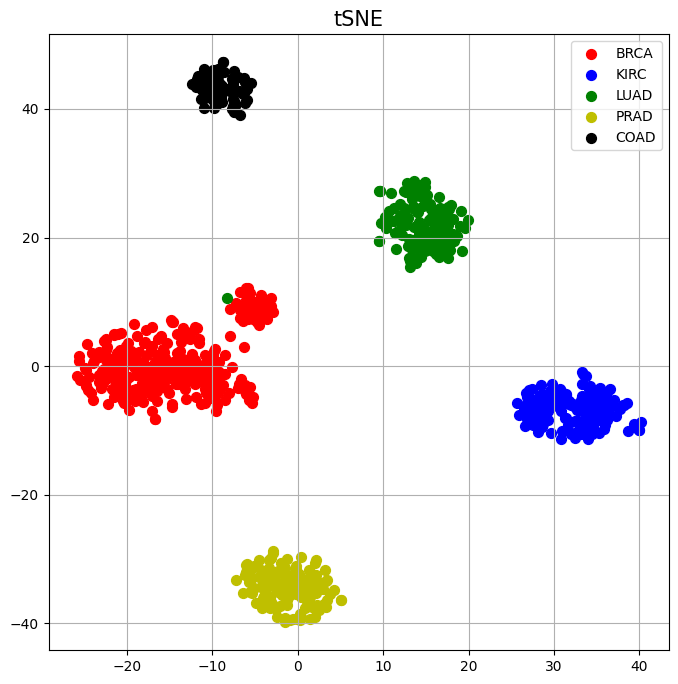

In [ ]:
fig_2 = plt.figure(figsize=(8,8))
ax_2 = fig_2.add_subplot(1,1,1)
ax_2.set_title('tSNE', fontsize=15)
labels_list_2 = ['BRCA', 'KIRC', 'LUAD', 'PRAD', 'COAD']
colors_2 = ['r', 'b', 'g', 'y', 'black']

for lab, color in zip(labels_list_2, colors_2):
    indices_2 = tsne_concat_df['Class'] == lab
    ax_2.scatter(tsne_concat_df.loc[indices_2, 'tsne 1'],
              tsne_concat_df.loc[indices_2, 'tsne 2'],
              c = color,
              s = 50)
    ax_2.legend(labels_list_2)
    ax_2.grid()


## Supervised Machine Learning
---
### 1. K-Nearest neighbors classifier



In [ ]:
bool_array = np.random.rand(len(x)) < 0.7

In [ ]:
y = tsne_concat_df['Class']


In [ ]:
x_train = x[bool_array]
y_train = y[bool_array]
x_test = x[~bool_array]
y_test = y[~bool_array]

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

(562, 562, 239, 239)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train.values.ravel())

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
knn.score(x_train, y_train), knn.score(x_test, y_test)

(0.998220640569395, 1.0)

In [ ]:
knn_count = 0
knn_correct = 0
for i in range(len(y_test)):
    knn_count += 1
    if knn_pred[i] == y_test.values.ravel()[i]:
        knn_correct += 1
knn_correct/knn_count


1.0

### 2. Support Vector Machines (SVMs)

In [ ]:
svm = SVC()
svm.fit(x_train, y_train.values.ravel())

SVC()

In [ ]:
svm.score(x_train, y_train), svm.score(x_test, y_test)

(0.998220640569395, 0.99581589958159)

### 3. Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train.values.ravel())

DecisionTreeClassifier()

In [ ]:
tree_clf.score(x_train, y_train), tree_clf.score(x_test, y_test)

(1.0, 0.9539748953974896)

In [ ]:
export_graphviz(tree_clf,
                out_file='my_tree.dot',
                feature_names=x.columns.values,
                class_names=labels_list_2,
                filled=True,
                rounded=True,
                special_characters=True)